In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [47]:
def convert_txt_to_csv():    
    num_file = 0
    for root, dirs, files in os.walk(".", topdown=False):
        for name in files:
            file_name = os.path.join(root, name)
            if '.txt' in file_name:
                print(file_name)
                num_file += 1
                f = open(file_name)
                data = ''
                for line in f:
                    if '#DEBUG' not in line:
                        data += line
                f.close()
                f = open(file_name[:-3]+'csv', "w")
                f.write(data)
                f.close()

    #     for name in dirs:
    #         print(os.path.join(root, name))
    print(num_file)
    
def convert_time_axis(x):
    x = [int(i.split(':')[-1]) for i in x]
    zero_count = -1
    t = []
    for i in x:
        if i == 0:
            zero_count += 1
        i = i + zero_count*60
        t.append(i)
    return t

def replace_missing_value(y):
    for i in range(len(y)):
        if y[i] == 'M':
            if i != 0:
                y[i] = y[i-1]
            else:
                y[i] = 0
                    
        else:
            y[i] = float(y[i])
    return y
    

Text(0, 0.5, 'wind speed in kts')

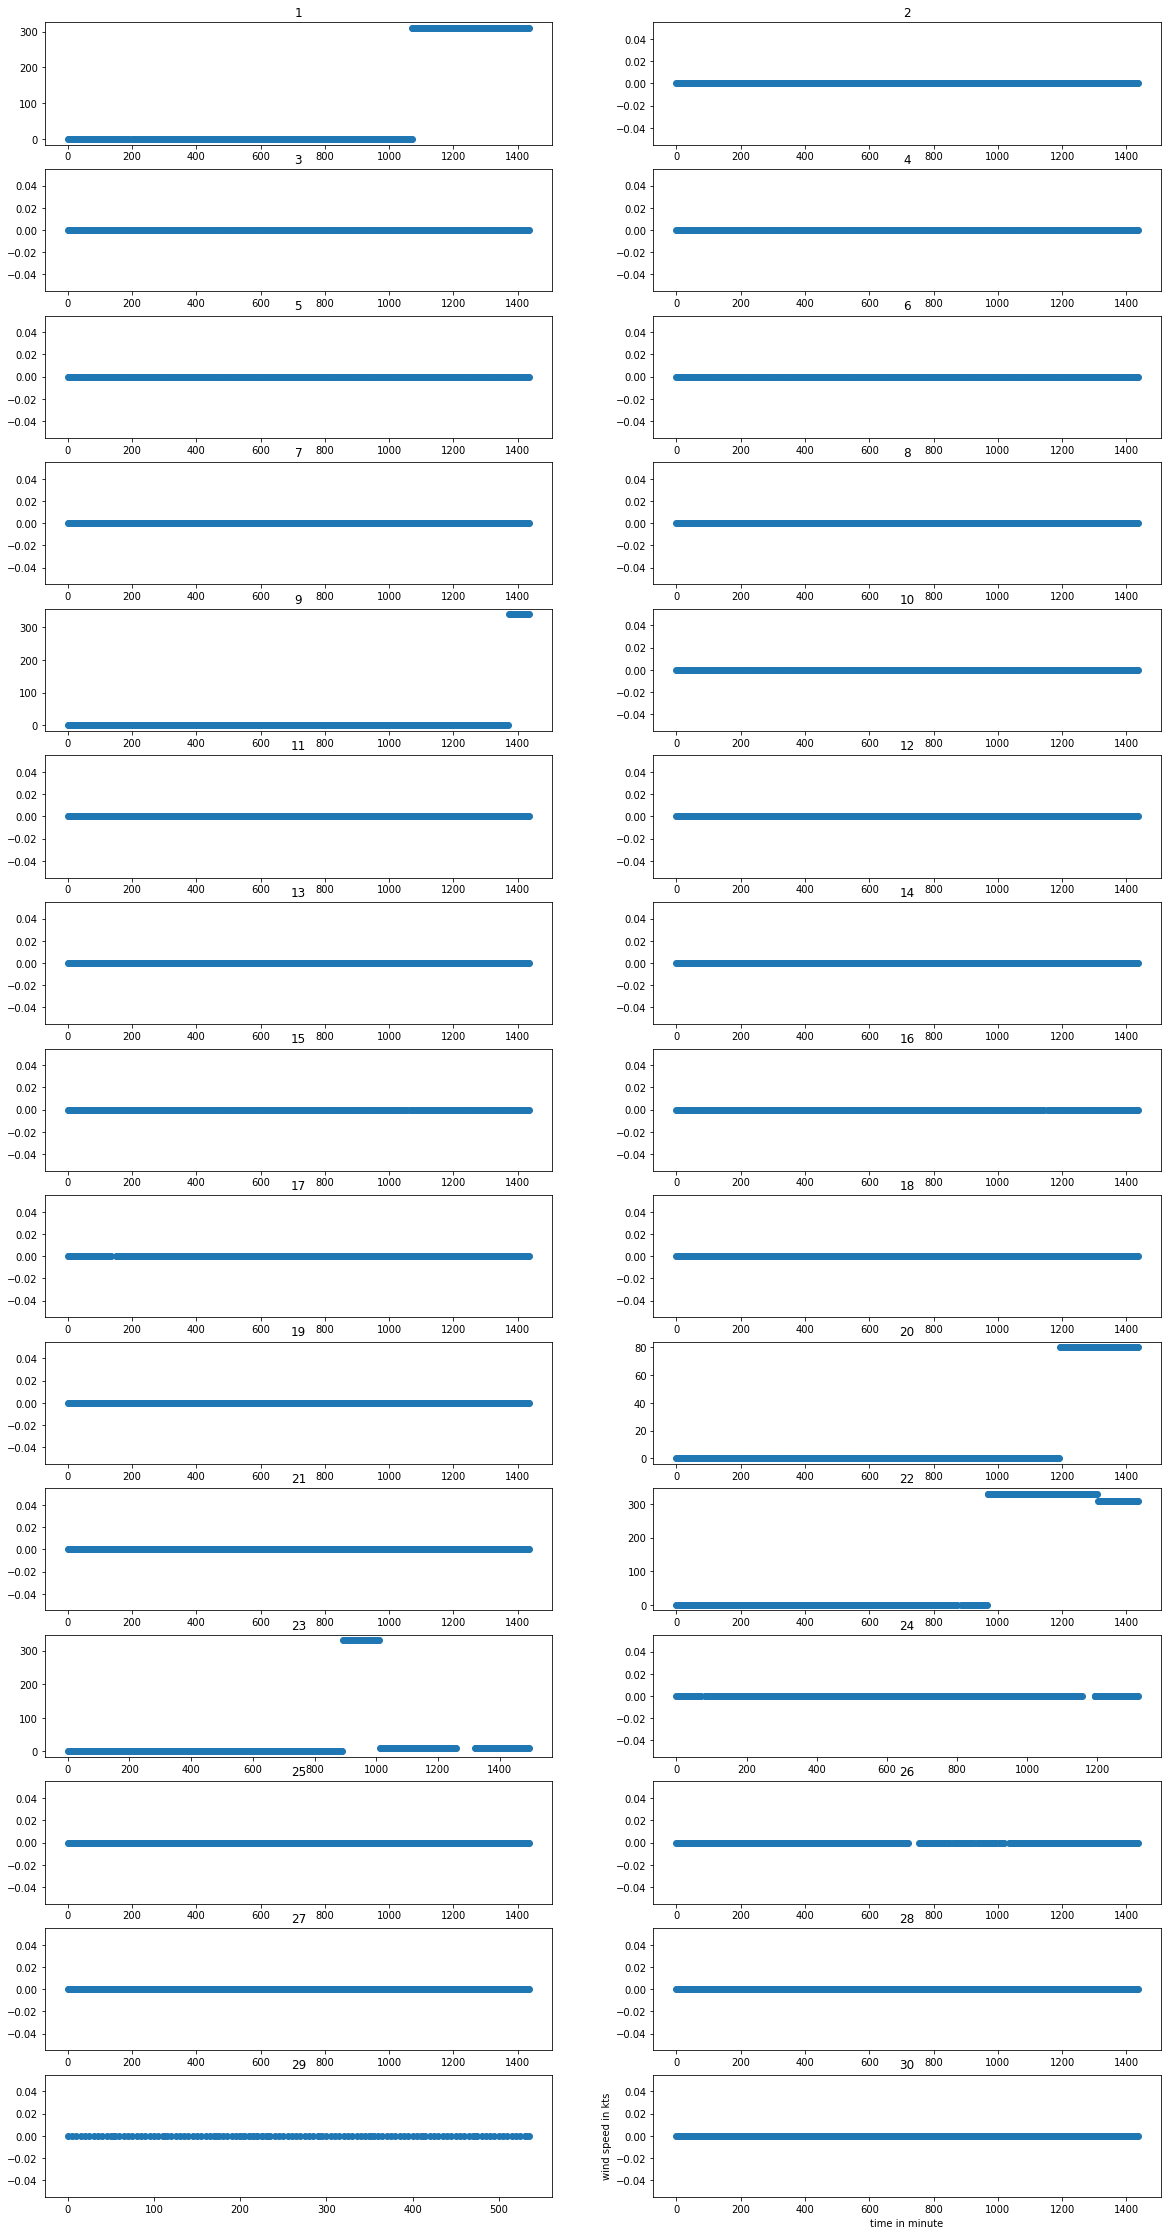

In [53]:
plt.figure(figsize=(20,40))
indx = 1
mu = []
std = []
for i in range(9,10):
    for j in range(1,31):
        file_name = './2021{:02d}{:02d}.csv'.format(i,j)
#         print(file_name)
        data = pd.read_csv(file_name)
        y = data[data['station']=='ATL']['peak_wind_drct']
        x = data[data['station']=='ATL']['valid']
        y = y.values
        y = replace_missing_value(y)
        t = convert_time_axis(x)
        plt.subplot(15,2,indx)
        plt.title(str(indx))
        indx += 1
        plt.scatter(t,y)
        mu.append(np.mean(y))
        std.append(np.std(y))
plt.xlabel("time in minute")
plt.ylabel("wind speed in kts")

In [55]:
len(x)

312

In [30]:
from scipy import stats

In [32]:
stats.ttest_ind(mu[20:10], mu[20:30])

Ttest_indResult(statistic=0.5826718864661102, pvalue=0.5673425351071724)

In [36]:
stats.f_oneway(mu[0:5], mu[5:10], mu[10:15], mu[15:20], mu[20:25], mu[25:30])

F_onewayResult(statistic=2.380872760360634, pvalue=0.0687795586299369)

In [44]:
stats.ttest_ind(mu[15:20],  mu[25:30])

Ttest_indResult(statistic=3.1542486208893057, pvalue=0.013511620242025141)

In [6]:
y = data[data['station']=='ATL']['sknt']
x = data[data['station']=='ATL']['valid']

In [7]:
y = y.values
y = list(map(float,y))

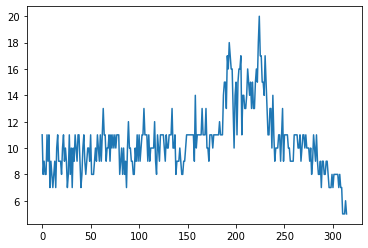

In [8]:
plt.plot(y)

1768      2021-09-01 00:00
2915      2021-09-01 00:05
3976      2021-09-01 00:10
5898      2021-09-01 00:15
7317      2021-09-01 00:20
                ...       
481914    2021-09-01 23:40
483010    2021-09-01 23:45
484446    2021-09-01 23:50
485502    2021-09-01 23:52
487418    2021-09-01 23:55
Name: valid, Length: 315, dtype: object

In [62]:
x1 = [i.split(' ')[-1] for i in x]

Text(0, 0.5, 'Speed in kts(1 kts= 0.514444 m/s)')

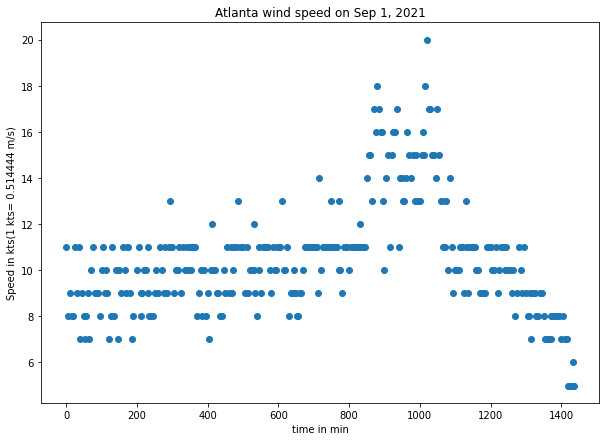

In [76]:
plt.figure(figsize=(10,7))
plt.scatter(x3,y)
plt.title("Atlanta wind speed on Sep 1, 2021")
plt.xlabel("time in min")
plt.ylabel("Speed in kts(1 kts= 0.514444 m/s)")

In [78]:
y = data[data['station']=='ATL']['drct']
y = y.values
y = [float(i) if i != 'M' else -1 for i in y]

Text(0, 0.5, 'direction in degrees from true north')

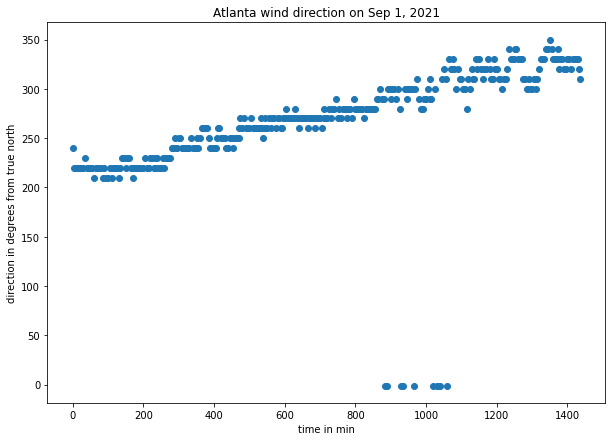

In [80]:
plt.figure(figsize=(10,7))
plt.scatter(x3,y)
plt.title("Atlanta wind direction on Sep 1, 2021")
plt.xlabel("time in min")
plt.ylabel("direction in degrees from true north")

In [81]:
y = data[data['station']=='ATL']['gust']
y = y.values
y = [float(i) if i != 'M' else -1 for i in y]

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(x3,y)
plt.title("Atlanta wind gust on Sep 1, 2021")
plt.xlabel("time in min")
plt.ylabel("Speed in kts(1 kts= 0.514444 m/s)")

Text(0, 0.5, 'Speed in kts(1 kts= 0.514444 m/s)')